In [1]:
#On importe tous les packages nécessaires

from pymatgen.ext.matproj import MPRester
import numpy as np
import scipy.constants as sc
import matplotlib.image as mpimg
from pymatgen.electronic_structure.core import Spin
from pymatgen.electronic_structure.plotter import *
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt

In [2]:
with MPRester ("7dRNB3pyHFTcJ6LC") as m:
    
    #On crée notre stucture sur base du fichier MP
    structure = m.get_structure_by_material_id("mp-2894")
    

In [3]:
with MPRester ("7dRNB3pyHFTcJ6LC") as m:
    band = m.get_bandstructure_by_material_id("mp-2894")
print("Notre Band gap =",band.get_band_gap()['energy'],"[eV]")

Notre Band gap = 0.12249999999999961 [eV]


BANDE INTERDITE
____________________________________

On a une bande directe :  False
Energie du "band gap" :  0.12249999999999961 eV
Type de transition de bande :  \Gamma-X
Energie de Fermi :  6.13418406


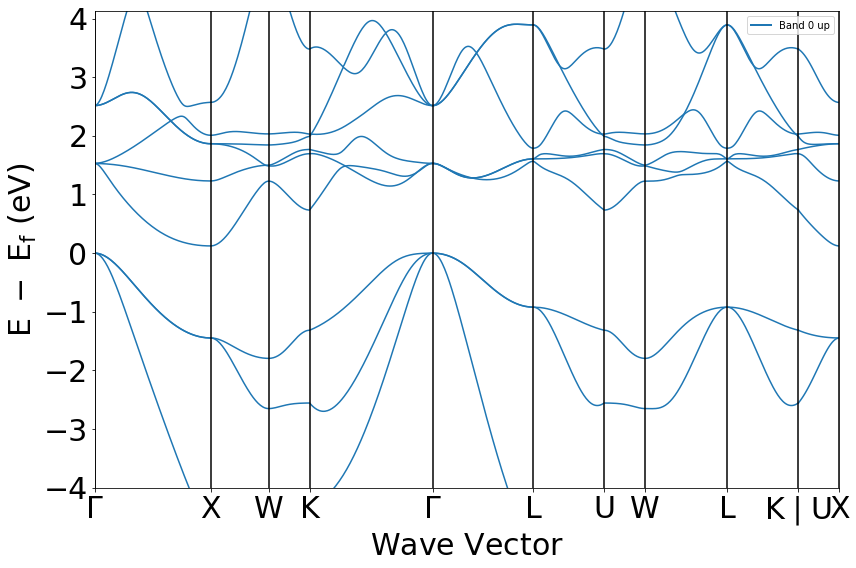

In [4]:
#Données sur la bande interdite
band_gap = band.get_band_gap()

#Caractéristique de cette bande 
print('On a une bande directe : ', band_gap['direct'])
print('Energie du \"band gap\" : ', band_gap['energy'], 'eV')
print('Type de transition de bande : ', band_gap['transition'])
print('Energie de Fermi : ', band.efermi)

#Figure de bande
plot = BSPlotter(band)

#Données sur la structure de bande
data = plot.bs_plot_data()
ticks = data.get('ticks')
energy = data.get('energy')
branche = ticks.get('distance')

#Montrer la structure de bande
plot.show()

In [5]:
vbm = band.get_vbm()['band_index']
print(vbm)
print("On voit que les bandes de valence 15,16 et 17 contiennent la plus grande énergie")

defaultdict(<class 'list'>, {<Spin.up: 1>: [15, 16, 17]})
On voit que les bandes de valence 15,16 et 17 contiennent la plus grande énergie


In [6]:
cbm = band.get_cbm()['band_index']
print(cbm)
print("On voit ici que 18ème bande contient l'énergie la plus basse")

defaultdict(<class 'list'>, {<Spin.up: 1>: [18]})
On voit ici que 18ème bande contient l'énergie la plus basse


In [7]:
Data = plot.bs_plot_data()
dist = Data.get('ticks').get('distance')
print ("Print du tableau dist :""\n","\n",dist)
print("\n""On ne garde pas toutes les valeurs des distances à cause des dégénérescences.""\n")
distV2 = np.array([dist[0],dist[1],dist[3],dist[5],dist[7],dist[9],dist[11],dist[13],dist[15],dist[17],dist[18]])
print("Print du tableau distV2, où l'on a éliminé les doublons : ""\n","\n", distV2)
Energy = Data.get('energy')
BranchVector = Data.get('distances')

Print du tableau dist :
 
 [0.0, 0.9634130506923989, 0.9634130506923989, 1.4451195760385986, 1.4451195760385986, 1.7857375266527062, 1.7857375266527062, 2.8075913784956765, 2.8075913784956765, 3.6419315547327558, 3.6419315547327558, 4.23189915116649, 4.23189915116649, 4.572517101780594, 4.572517101780594, 5.253753003008811, 5.253753003008811, 5.8437205994425465, 6.184338550056797]

On ne garde pas toutes les valeurs des distances à cause des dégénérescences.

Print du tableau distV2, où l'on a éliminé les doublons : 
 
 [0.         0.96341305 1.44511958 1.78573753 2.80759138 3.64193155
 4.23189915 4.5725171  5.253753   5.8437206  6.18433855]


In [8]:
DiffAbsc = np.zeros(10); DiffOrdCond = np.zeros(10) ; DiffOrdVal = np.zeros(10) ; SlopeCond = np.zeros(10) ;
SlopeVal = np.zeros(10)

for i in range(10):
    DiffAbsc[i] = distV2[i+1] - distV2[i]
    
for i in range(10):
    DiffOrdVal[i] =Energy.get('1')[i][17][-1] - Energy.get('1')[i][17][0]
    DiffOrdCond[i] =Energy.get('1')[i][18][-1] - Energy.get('1')[i][18][0]
    
for i in range (10):
    SlopeCond [i] = DiffOrdCond[i]/DiffAbsc[i]
    SlopeVal[i] = DiffOrdVal[i]/DiffAbsc[i]
    
    

MaxSlopeVal = np.max(abs(SlopeVal))
MinSlopeVal = np.min(abs(SlopeVal))
MaxSlopeCond = np.max(abs(SlopeCond))
MinSlopeCond = np.min(abs(SlopeCond))

### On peut donc imprimer nos dispersions maximales et minimales pour chaque bande

print ("Plus grande pente dans la bande de valence:",MaxSlopeVal)
print ("Plus petite pente dans la bande de valence:",MinSlopeVal)
print ("Plus grande pente dans la bande de conduction:",MaxSlopeCond)
print ("Plus petite pente dans la bande de conduction:",MinSlopeCond)


Plus grande pente dans la bande de valence: 1.5015366451184544
Plus petite pente dans la bande de valence: 0.38576945156014575
Plus grande pente dans la bande de conduction: 2.2933050350647806
Plus petite pente dans la bande de conduction: 0.04494569609380148


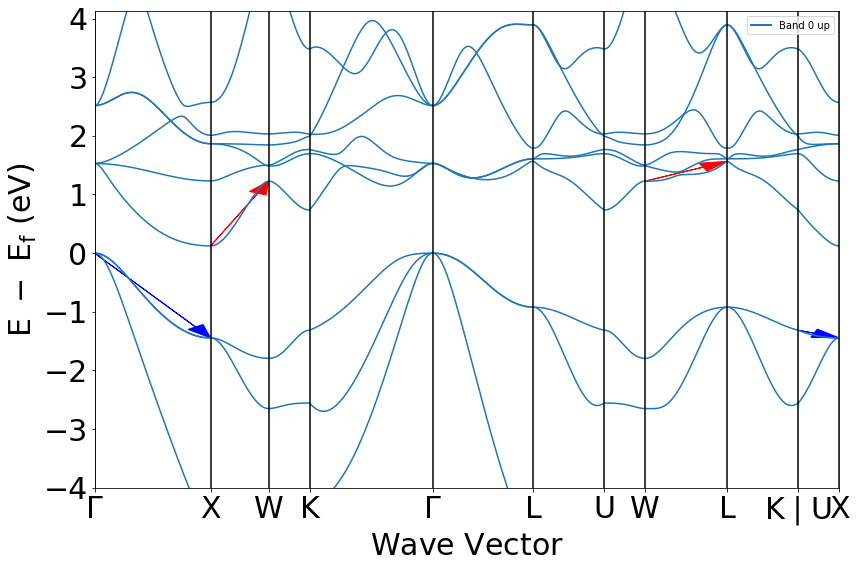

In [9]:
plot.get_plot()
plt.arrow(distV2[0], (Energy.get('1')[0][17])[0], DiffAbsc[0], DiffOrdVal[0], color = 'b', head_width = 0.15,length_includes_head=True)
plt.arrow(distV2[9], (Energy.get('1')[9][17])[0], DiffAbsc[9], DiffOrdVal[9], color = 'b', head_width = 0.15,length_includes_head=True)
plt.arrow(distV2[1], (Energy.get('1')[1][18])[0], DiffAbsc[1], DiffOrdCond[1], color = 'r', head_width = 0.15,length_includes_head=True)
plt.arrow(distV2[7], (Energy.get('1')[7][18])[0], DiffAbsc[7], DiffOrdCond[7], color = 'r', head_width = 0.15,length_includes_head=True)

plt.show()


In [10]:
#### Les abscisses qui nous intéressent ####

Gx = BranchVector[3] 
GXx = BranchVector[4] 
QFx = BranchVector[0] 
FP1x = BranchVector[1] 

### Les ordonnées qui nous intéressent ####

# Pour la bande de valence
G_Ord_Val = Energy.get('1')[3][17] 
GX_Ord_Val = Energy.get('1')[4][17] 

# Pour la bande de conduction
QF_Ord_Cond = Energy.get('1')[0][18] 
FP1_Ord_Cond = Energy.get('1')[1][18] 

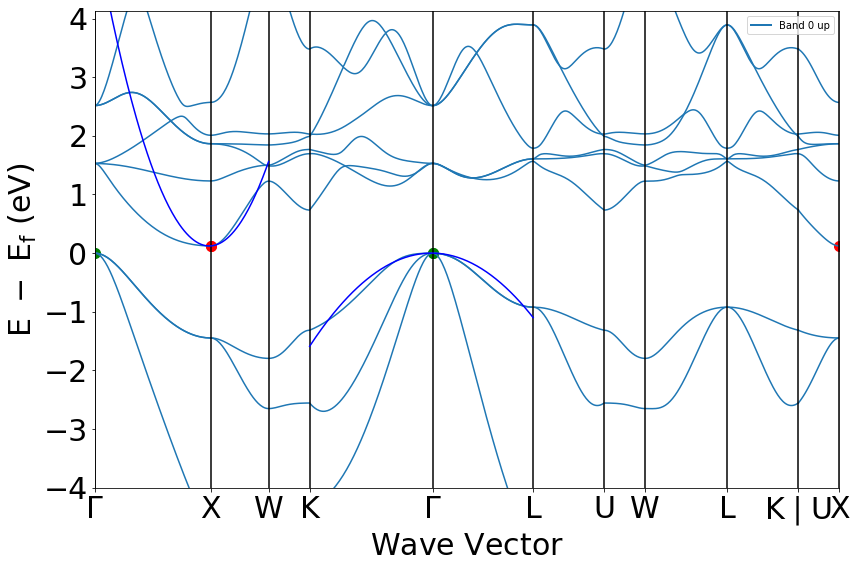

In [11]:
# On va donc faire un polyfit pour trouver la parabole qui épouse le mieux la forme de la 
# dispersion rélle sur notre graphe. On va se donner des points à gauche et à droite des extrémas (connus)


### Les points choisis (4) à gauche et à droite ###
AbscVal = np.append(Gx[-4:],GXx[0:4]) 
AbscCond = np.append(QFx[-4:],FP1x[0:4]) 
OrdVal = np.append(G_Ord_Val[-4:],GX_Ord_Val[0:4]) 
OrdCond = np.append(QF_Ord_Cond[-4:],FP1_Ord_Cond[0:4]) 


### Les coefficients obtenus par polyfit sur chaque bande, placés dans un tableau ###
CoefTabVal= np.polyfit(AbscVal,OrdVal,2) 
CoefTabCond = np.polyfit(AbscCond,OrdCond,2) 


### On donne des tableaux de coordonnées pour tracer les deux paraboles ###
AbsValPlot = np.append(Gx,GXx) 
AbsCondPlot = np.append(QFx,FP1x) 
OrdValPlot = np.append(G_Ord_Val,GX_Ord_Val) 
OrdCondPlot = np.append(QF_Ord_Cond,FP1_Ord_Cond) 


### On fait le plot avec les tableaux ci-dessus ###
plot.get_plot(vbm_cbm_marker=True) 
plt.plot(AbsValPlot,CoefTabVal[0]*AbsValPlot**2+CoefTabVal[1]*AbsValPlot+CoefTabVal[2],color='blue') 
plt.plot(AbsCondPlot,CoefTabCond[0]*AbsCondPlot**2+CoefTabCond[1]*AbsCondPlot+CoefTabCond[2],color='blue') 
plt.show()

In [12]:
print("Masse effective de la bande de conduction:",(sc.hbar)*(sc.hbar)/(10**(-20)*sc.e*2*CoefTabVal[0]),"kg")
print("Masse effective de la bande de valence:",(sc.hbar)**2/(10**(-20)*sc.e*2*CoefTabCond[0]),"kg")

Masse effective de la bande de conduction: -2.2423756835573224e-30 kg
Masse effective de la bande de valence: 5.838338234361395e-31 kg
